<a href="https://colab.research.google.com/github/patriciaanggraeni/PCVK_Ganjil_2023/blob/main/week_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import cv2 as cv
import numpy as np

from skimage import filters
from google.colab import drive
from skimage import img_as_float
from matplotlib import pyplot as plt
from skimage import io, color, morphology
from skimage.morphology import skeletonize

In [2]:
drive.mount("/content/drive/")

Mounted at /content/drive/


## 1. Praktikum Nomor 3: Dilasi tanpa library



In [16]:
def dilasi_citra(F, w):
  height, width = F.shape

  image_copy = np.zeros((height, width), dtype=np.uint8)

  # generate structure element
  structure_element = np.ones((w,w), dtype=np.uint8)
  constant = (w - 1) // 2

  # melakukan proses dilasi
  for i in range(constant, height - constant):
    for j in range(constant, width - constant):
      temp = F[i-constant:i+constant+1,j-constant:j+constant+1]
      product = temp * structure_element
      image_copy[i,j]= np.max(product)

  return image_copy

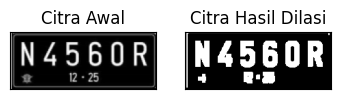

In [17]:
image = cv.imread('/content/drive/MyDrive/PCVK/Images/plat_nomor.png', 0)

w = 5
ret, thresh = cv.threshold(image , 125, 200, cv.THRESH_BINARY)
image_copy = dilasi_citra(thresh, w)

plt.subplot(131),plt.imshow(image, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(image_copy, cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

 ## 2. Praktikum Nomor 4: Dilasi dengan library (3x3)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


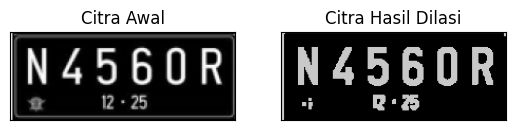

In [19]:
image = cv.imread('/content/drive/MyDrive/PCVK/Images/plat_nomor.png')

ret, thresh = cv.threshold(image , 125, 200, cv.THRESH_BINARY)
kernel = np.ones((3,3), np.uint16)
dilasi = cv.dilate(thresh, kernel, iterations = 1)
print(kernel)

plt.subplot(121), plt.imshow(image), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(dilasi), plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

 ## 3. Praktikum Nomor 5: Erosi tanpa library (5x5)

In [33]:
def erosi_citra(F, k):
  height, width = F.shape

  structural_erosi = np.ones((k,k), dtype=np.uint8)
  constant = (k - 1) // 2

  image_copy = np.zeros((height, width), dtype=np.uint8)
  for i in range(constant, height - constant):
    for j in range(constant, width - constant):
      temp = F[i-constant:i+constant+1,j-constant:j+constant+1]
      product = temp * structural_erosi
      image_copy[i,j] = np.min(product)

  return image_copy

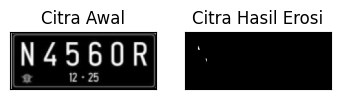

In [41]:
image = cv.imread('/content/drive/MyDrive/PCVK/Images/plat_nomor.png', 0)

k = 5
ret, thresh = cv.threshold(image, 175, 225, cv.THRESH_BINARY)
image_copy = erosi_citra(thresh, k)

plt.subplot(131), plt.imshow(image, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(image_copy, cmap = 'gray')
plt.title('Citra Hasil Erosi'),plt.xticks([]), plt.yticks([])
plt.show()

 ## 4. Praktikum Nomor 6: Erosi dengan library (5x5)

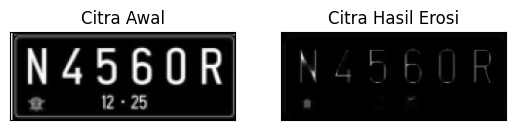

In [42]:
image = cv.imread('/content/drive/MyDrive/PCVK/Images/plat_nomor.png')
kernel = np.ones((5,5), np.uint8)
erosion = cv.erode(image, kernel,iterations = 1)

plt.subplot(121),plt.imshow(image),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])
plt.show()

 ## 6. Praktikum Nomor 7: Opening tanpa dan dengan library (3x3)

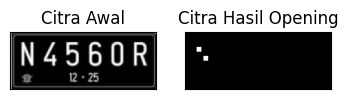

In [44]:
image = cv.imread('/content/drive/MyDrive/PCVK/Images/plat_nomor.png', 0)

k = 7
reto, thresh = cv.threshold(image, 127, 225, cv.THRESH_BINARY)
image_result = dilasi_citra(erosi_citra(thresh,k),k)

plt.subplot(131), plt.imshow(image,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(image_result, cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

 ## 7. Praktikum Nomor 8: Opening dengan library

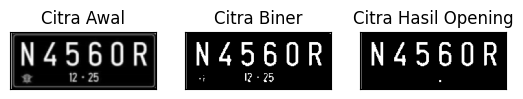

In [46]:
#Dengan Menggunakan Library
img = cv.imread('/content/drive/MyDrive/PCVK/Images/plat_nomor.png', 0)
ret, thresh = cv.threshold(img, 127, 225, cv.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
openn = cv.morphologyEx(thresh,cv.MORPH_OPEN, kernel)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(openn,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])

plt.show()

 ## 8. Praktikum Nomor 9: Opening tanpa dan dengan library (3x3)

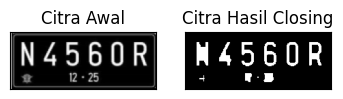

In [47]:
image = cv.imread('/content/drive/MyDrive/PCVK/Images/plat_nomor.png', 0)

k = 7
retc, threshc = cv.threshold(image, 127, 225, cv.THRESH_BINARY)
image_copy = erosi_citra(dilasi_citra(threshc,k),k)

plt.subplot(131),plt.imshow(image,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(image_copy,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])

plt.show()

 ## 9. Praktikum Nomor 10: Closing tanpa library

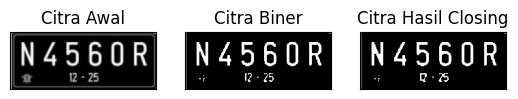

In [49]:
image = cv.imread('/content/drive/MyDrive/PCVK/Images/plat_nomor.png', 0)
ret, thresh = cv.threshold(image, 127, 225, cv.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
image_result = cv.morphologyEx(thresh,cv.MORPH_CLOSE, kernel)

plt.subplot(131),plt.imshow(image,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')

plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(image_result,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])

plt.show()

 ## Praktikum Nomor 11: Operasi dilasi (3x3) dan (5x5)

In [55]:
def dilasi_citra(F,w):
  p,q = F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)
  SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([[0, 1, 0],
  [1, 1, 1],
  [0, 1, 0]], dtype = np.uint8)
  constant1 = (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j- constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)

  return imgD

print('SED = Cross 3')

SED = Cross 3


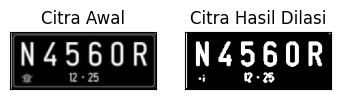

In [56]:
img_d = cv.imread('/content/drive/MyDrive/PCVK/Images/plat_nomor.png', 0)

w = 3
ret, thresh = cv.threshold(img_d, 127, 225, cv.THRESH_BINARY)
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])

plt.show()

In [57]:
def dilasi_citra(F,w):
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)
  SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([
      [0, 0, 1, 0, 0],
      [0, 0, 1, 0, 0],
      [1, 1, 1, 1, 1],
      [0, 0, 1, 0, 0],
      [0, 0, 1, 0, 0]], dtype = np.uint8)

  constant1= (w-1)//2

  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-
      constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)

  return imgD

SED = Cross 5


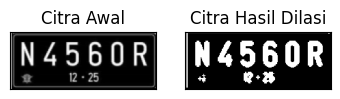

In [58]:
print('SED = Cross 5')
img_d= cv.imread('/content/drive/MyDrive/PCVK/Images/plat_nomor.png', 0)

w = 5
ret, thresh = cv.threshold(img_d, 127, 225, cv.THRESH_BINARY)
imgD = dilasi_citra(thresh,w)


plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])

plt.show()

 ## Praktikum Nomor 12: Operasi dilasi (3x5) dan (5x7)

In [60]:
def erosi_citra(F,p,l):

  m,n= F.shape
  SE = cv.getStructuringElement(cv.MORPH_RECT,(p,l))
  constant1= (l-1)//2
  constant2= (p-1)//2

  imgE= np.zeros((m,n), dtype=np.uint8)

  for i in range(constant1, m-constant1):
    for j in range(constant2,n-constant2):
      temp= F[i-constant1:i+constant1+1, j-constant2:j+constant2+1]
      product= temp*SE
      imgE[i,j] = np.min(product)

  return imgE

SE = Rectangle 3x5


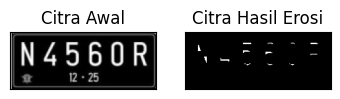

In [61]:
print('SE = Rectangle 3x5')

img_e= cv.imread('/content/drive/MyDrive/PCVK/Images/plat_nomor.png', 0)

p, l = 5, 3
ret1, thresh1 = cv.threshold(img_e, 127, 225, cv.THRESH_BINARY)
imgE = erosi_citra(thresh1,p,l)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])

plt.show()

SE = Rectangle 5x7


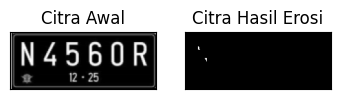

In [62]:
print('SE = Rectangle 5x7')
img_e = cv.imread('/content/drive/MyDrive/PCVK/Images/plat_nomor.png', 0)

l, p = 7, 5
ret1, thresh1 = cv.threshold(img_e, 127, 225, cv.THRESH_BINARY)
imgE = erosi_citra(thresh1,p,l)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])

plt.show()

## Praktikum Nomor 13: Operasi erosi Line Vertikal 3 dan 5

In [65]:
def erosi_citra(F,k):
  m,n= F.shape

  SE = cv.getStructuringElement(cv.MORPH_ELLIPSE,(1,k))
  constant= (k-1)//2

  imgE= np.zeros((m,n), dtype=np.uint8)
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp= F[i-constant:i+constant+1, j- constant:j+constant+1]
      product= temp*SE
      imgE[i,j]= np.min(product)

  return imgE

SE = Line Vertikal 3


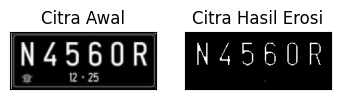

In [66]:
print('SE = Line Vertikal 3')

k = 3
img_e= cv.imread('/content/drive/MyDrive/PCVK/Images/plat_nomor.png', 0)
ret1, thresh1 = cv.threshold(img_e, 127, 225, cv.THRESH_BINARY)
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

SE = Line Vertikal 5


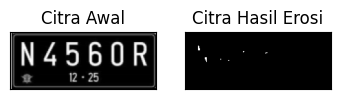

In [67]:
print('SE = Line Vertikal 5')
img_e= cv.imread('/content/drive/MyDrive/PCVK/Images/plat_nomor.png', 0)

k = 5
ret1, thresh1 = cv.threshold(img_e, 127, 225, cv.THRESH_BINARY)
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

## Praktikum 14: TopHat

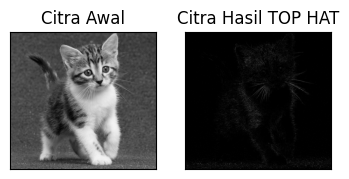

In [72]:
filterSize =(3, 3)
kernel = cv.getStructuringElement(cv.MORPH_RECT,
filterSize)

img = cv.imread('/content/drive/MyDrive/PCVK/Images/kitten01.png')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
tophat_img = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)

#cv2.imshow("original", input_image)
#cv2.imshow("tophat", tophat_img)
#cv2.waitKey(5000)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(tophat_img,cmap = 'gray')
plt.title('Citra Hasil TOP HAT'), plt.xticks([]), plt.yticks([])
plt.show()

## Praktikum 15: BlackHat

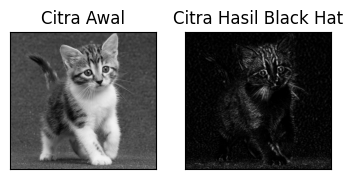

In [73]:
filterSize =(3, 3)
kernel = cv.getStructuringElement(cv.MORPH_RECT, filterSize)
img = cv.imread('/content/drive/MyDrive/PCVK/Images/kitten01.png')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Applying the Black-Hat operation
#tophat_img = cv.morphologyEx(img,cv.MORPH_BLACKHAT, kernel)
Kernel = cv.getStructuringElement(cv.MORPH_RECT, (13, 5))
blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, Kernel)

#cv.imshow("original", input_image)
#cv.imshow("tophat", tophat_img)
#cv.waitKey(5000)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(blackhat,cmap = 'gray')
plt.title('Citra Hasil Black Hat'), plt.xticks([]), plt.yticks([])
plt.show()

## Praktikum 16: Skeleton

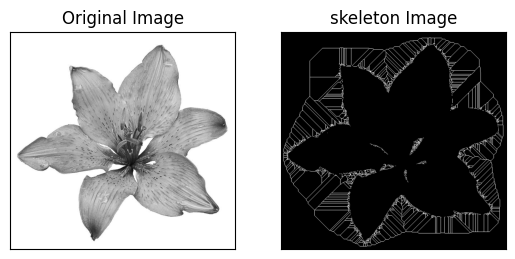

In [75]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lily.jpg', 0)
binary = img > filters.threshold_triangle(img)
# true false to one
binary_cp = binary.copy()
binary_cp[binary_cp == True] = 1
binary_cp[binary_cp == False] = 0

# skeletonize image
skeleton = skeletonize(binary_cp)

# print images plt.figure(figsize=(20,20))

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(skeleton,cmap = 'gray')
plt.title('skeleton Image'), plt.xticks([]), plt.yticks([])

plt.savefig("binary and bin_skeleton.png")
plt.show()


## Praktikum 17: Skeleton Inverse

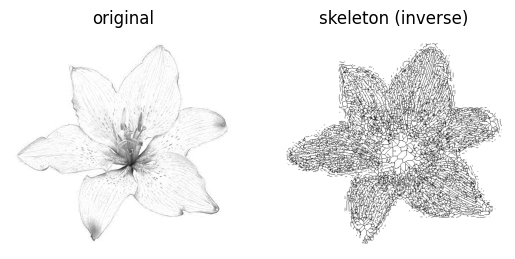

In [77]:
img = io.imread('/content/drive/MyDrive/PCVK/Images/lily.jpg')[..., 0]

binary = img < filters.threshold_triangle(img)
skeleton = skeletonize(binary)
fig, ax = plt.subplots(1, 2)

ax[0].imshow(img, cmap='gray')
ax[0].set_title('original')
ax[0].set_axis_off()

# note the reversed colormap, gray_r
ax[1].imshow(skeleton, cmap='gray_r')
ax[1].set_title('skeleton (inverse)')
ax[1].set_axis_off()

plt.show()

## Praktikum 18: Thickening

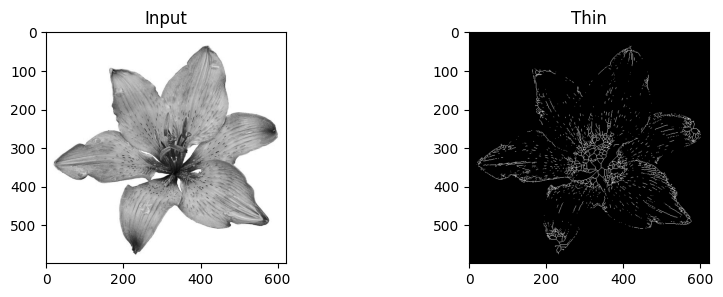

In [78]:
image = img_as_float(color.rgb2gray(io.imread('/content/drive/MyDrive/PCVK/Images/lily.jpg')))

image_binary = image < 0.5
out_skeletonize = morphology.skeletonize(image_binary)
out_thin = morphology.thin(image_binary)
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))

ax0.imshow(image, cmap='gray')
ax0.set_title('Input')

ax1.imshow(out_thin, cmap='gray')
ax1.set_title('Thin')

plt.savefig('/content/drive/MyDrive/PCVK/Images/lily_result.png')
plt.show()

## Tugas Praktikum

===== SED Circle 3 =====


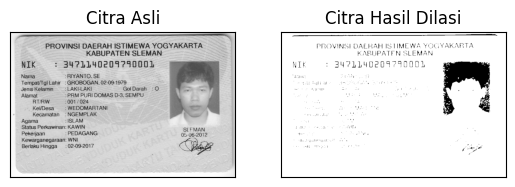

In [119]:
print("========================")
print("===== SED Circle 3 =====")
print("========================")

width = 3
image_path = '/content/drive/MyDrive/PCVK/Images/KTP/ktp.png'
image = cv.imread(image_path, 0)

ret, threshold = cv.threshold(image, 127, 200, cv.THRESH_BINARY)
kernel = np.ones((3,3), np.uint16)
image_result = cv.dilate(threshold, kernel, iterations = 1)

plt.subplot(121), plt.imshow(image, cmap = 'gray')
plt.title('Citra Asli'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(image_result, cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

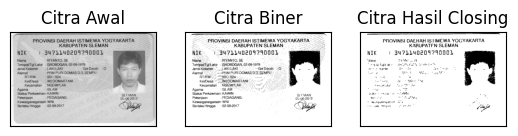

In [128]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP/ktp.png', 0)
ret, thresh = cv.threshold(img, 127, 225, cv.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
closs = cv.morphologyEx(thresh,cv.MORPH_CLOSE, kernel)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(closs,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])

plt.show()